In [6]:
import tensorflow as tf

In [2]:
a = tf.constant(1, name = 'a')
b = tf.constant(1, name = 'b')
c = a + b

# c : Tensor 형의 인스턴스
print(c)

with tf.Session() as sess :
    print(sess.run(c))

Tensor("add_1:0", shape=(), dtype=int32)
2


In [5]:
a = tf.constant(1, name = 'a')
b = tf.constant(1, name = 'b')
c = a + b

graph = tf.get_default_graph()
# print(graph)
print(graph.as_graph_def())
# → a, b, add가 노드로 되어 있는 것을 알 수 있다

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "add"
  op: "Add"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "a_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

In [10]:
a = tf.Variable(1, name = 'a')
b = tf.constant(1, name = 'b')
# tf.assign : 값을 대입하고 대입한 결과를 돌려주는 조작
# a에 a+b의 값을 대입하고, 대입 후 a의 값을 반환한다
c = tf.assign(a, a+b)
# c = tf.assign(b, a+b) → 오류 : b는 상수이므로 갱신 불가능

with tf.Session() as sess :
    # tf.global_variables_initializer : 모든 변수 초기화
    # 변수를 이용할 때는 세션의 첫 부분에서 반드시 초기화해야 한다
    sess.run( tf.global_variables_initializer() )
    print('첫 번째 : [c, a] = ', sess.run([c, a]))
    
    # 변수 c가 갱신된다
    print('두 번째 : [c, a] = ', sess.run([c, a]))

첫 번째 : [c, a] =  [2, 2]
두 번째 : [c, a] =  [3, 3]


In [12]:
# 플레이스홀더 : 다양한 값을 받아서 넣을 수 있는 '상자'
# tf.placeholder
# 값이 정해지지 않은 상태에서 미리 그래프를 구축하고,
# 실행할 때 구체적인 값을 지정할 수 있다
# 주로 입력 데이터 부분에서 이용

a = tf.placeholder(dtype = tf.int32, name = 'a')
b = tf.constant(1, name = 'b')
c = a + b

with tf.Session() as sess :
    print('a + b =', sess.run(c, feed_dict = { a:1 }))

a + b = 2


In [13]:
a = tf.constant(2, name = 'a')
b = tf.constant(3, name = 'b')
c = tf.add(a, b)   # a + b
d = tf.multiply(a, b)   # a * b

with tf.Session() as sess :
    print('a + b =', sess.run(c))
    print('a * b =', sess.run(d))

a + b = 5
a * b = 6


In [14]:
# 벡터 연산
# tf.constant와 tf.Variable의 인수로 배열을 지정함으로써
# 벡터를 이용할 수 있다

a = tf.constant([1, 2, 3], name = 'a')
b = tf.constant([4, 5, 6], name = 'b')
c = a + b

with tf.Session() as sess :
    print('a + b =', sess.run(c))

a + b = [5 7 9]


In [15]:
# 행렬 연산

a = tf.constant([ [1, 2], [3, 4] ], name = 'a')
b = tf.constant([ [1], [2] ], name = 'b')
c = tf.matmul(a, b)

print('shape of a : ', a.shape)
print('shape of b : ', b.shape)
print('shape of c : ', c.shape)

with tf.Session() as sess :
    print('a = \n', sess.run(a))
    print('b = \n', sess.run(b))
    print('c = \n', sess.run(c))

shape of a :  (2, 2)
shape of b :  (2, 1)
shape of c :  (2, 1)
a = 
 [[1 2]
 [3 4]]
b = 
 [[1]
 [2]]
c = 
 [[ 5]
 [11]]


In [17]:
# 텐서의 플레이스홀더와 미지의 차원

a = tf.placeholder(shape = (None, 2), dtype = tf.int32, name = 'a')

with tf.Session() as sess :
    print('-- [ [1, 2] ]를 대입 --')
    print('a = ', sess.run(a, feed_dict = {a: [[1, 2]]}))
    print('\n-- [ [1, 2], [3, 4] ]를 대입 --')
    print('a = ', sess.run(a, feed_dict = {a: [ [1, 2], [3, 4] ]}))

-- [ [1, 2] ]를 대입 --
a =  [[1 2]]

-- [ [1, 2], [3, 4] ]를 대입 --
a =  [[1 2]
 [3 4]]


In [19]:
# 세션이 바뀌면 변수가 초기화된다

a = tf.Variable(1, name = 'a')
b = tf.assign(a, a+1)

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    print('첫 번째 b =', sess.run(b))
    print('두 번째 b =', sess.run(b))

# 세션이 바뀌면 원래의 값으로 돌아가버린다
with tf.Session() as sess :
    print('-- 새로운 세션 --')
    sess.run(tf.global_variables_initializer())
    print('첫 번째 b =', sess.run(b))
    print('두 번째 b =', sess.run(b))    

첫 번째 b = 2
두 번째 b = 3
-- 새로운 세션 --
첫 번째 b = 2
두 번째 b = 3


In [23]:
# Saver로 변수 저장

a = tf.Variable(1, name = 'a')
b = tf.assign(a, a+1)

saver = tf.train.Saver()
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    print(sess.run(b))
    print(sess.run(b))
    # 변수의 값을 model/model.ckpt에 저장
    saver.save(sess, 'model/model.ckpt')

# Saver를 이용하면
saver = tf.train.Saver()
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    # model/model.ckpt로부터 변수의 값을 읽어들임
    saver.restore(sess, save_path = 'model/model.ckpt')
    print(sess.run(b))
    print(sess.run(b))

2
3
INFO:tensorflow:Restoring parameters from model/model.ckpt
4
5


In [24]:
# 요약 출력

LOG_DIR = './logs'

a = tf.constant(1, name = 'a')
b = tf.constant(1, name = 'b')
c = a+b

graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer :
    writer.add_graph(graph)

In [ ]:
# 경사법(경사하강법)
# 1. 파라미터를 적당한 값으로 초기화
# 2. 주어진 파라미터에 대한 함수의 기울기(경사)를 계산
# 3. 가장 기울기가 큰 방향으로 파라미터를 조금씩 이동
# 4. 2에서 3을 반복

In [25]:
# 경사하강법으로 2차원 함수 최소화
# 2차원 함수 y = (x-1)^2를 최소화하는 x를 찾는 코드

# 파라미터는 변수로 정의
x = tf.Variable(0., name = 'x')
# 파라미터를 사용해서 최소화하고 싶은 함수 정의
func = (x-1)**2

# learning_rate는 한번씩 움직이는 크기를 결정
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate = 0.1
)
# train_step은 x를 조금씩 움직이는 조작을 나타냄
train_step = optimizer.minimize(func)

# train_step을 반복 실행
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for i in range(20) :
        sess.run(train_step)
    print('x =', sess.run(x))

x = 0.98847073


### 머신러닝에 경사법 적용

In [26]:
# Boston house-prices 데이터 세트 내려받기

# x_train, y_train은 학습용으로 사용되는 데이터(학습 데이터)
# x_test, y_test는 정확도를 확인하는 데 사용되는 데이터(테스트 데이터)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

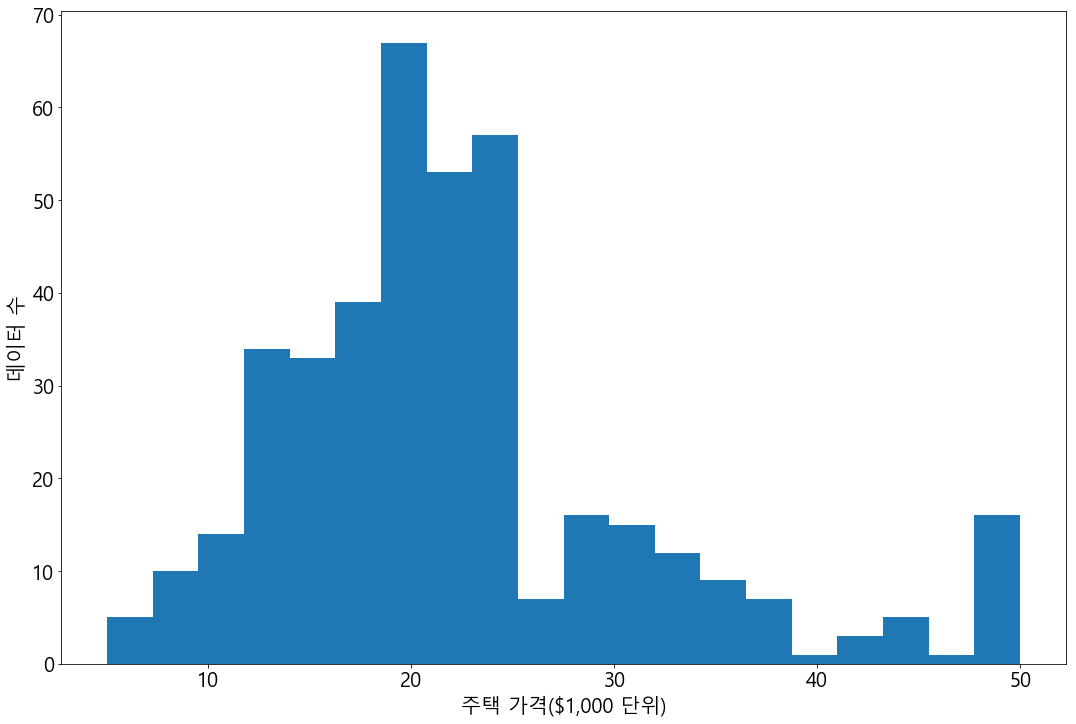

Text(0,0.5,'주택 가격($1,000 단위)')

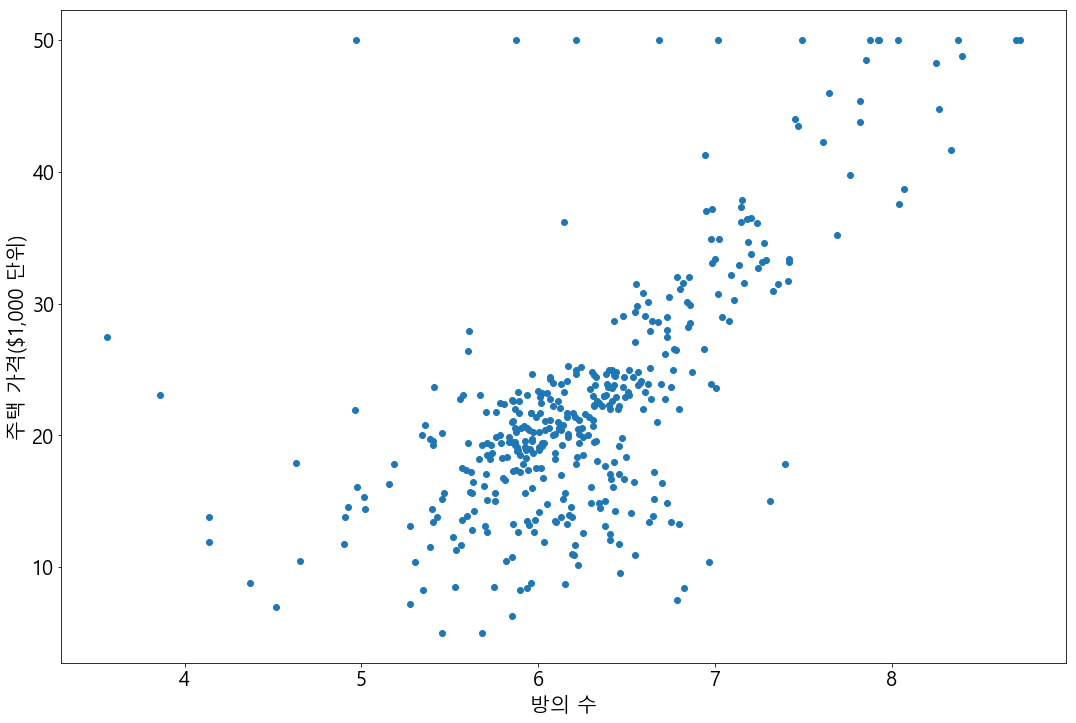

In [38]:
# 데이터 개요

# matplotlib의 그래프를 실행한 브라우저에서 바로 볼 수 있게 함
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10*2
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['font.family'] = ['Malgun Gothic']

# 히스토그램 표시
plt.hist(y_train, bins=20)
plt.xlabel('주택 가격($1,000 단위)')
plt.ylabel('데이터 수')
plt.show()

plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('방의 수')
plt.ylabel('주택 가격($1,000 단위)')

Text(0,0.5,'주택 가격(표준화 후)')

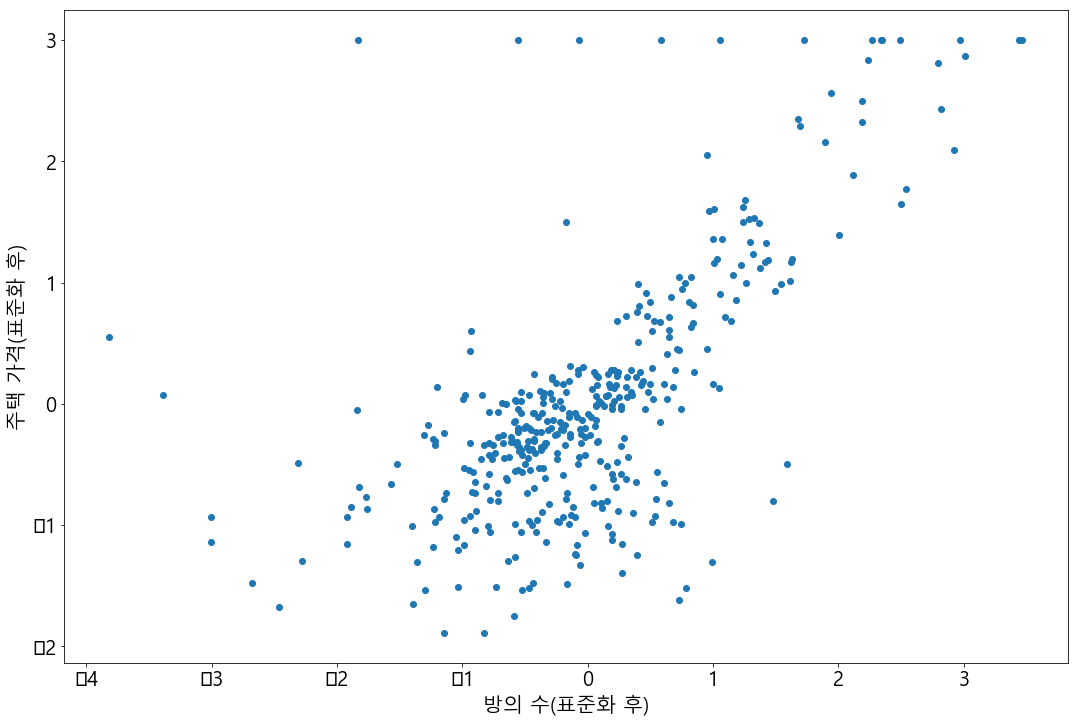

In [39]:
# 데이터 전처리
# 머신러닝 모델 구축 전 데이터 표준화
# 변수마다 평균값을 빼고 표준편차(데이터의 산포도를 나타내는 지표)로 나눈다

# 표준화한 방의 수와 주택 가격의 관계
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)

y_train_mean = y_train.mean()
y_train_std = y_train.std()

x_train = (x_train - x_train_mean) / x_train_std
y_train = (y_train - y_train_mean) / y_train_std
# x_test에 대해서도 x_train_mean과 x_train_std 사용
x_test = (x_test - x_train_mean) / x_train_std
# y_test에 대해서도 y_train_mean과 y_train_std 사용
y_test = (y_test - y_train_mean) / y_train_std

plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('방의 수(표준화 후)')
plt.ylabel('주택 가격(표준화 후)')

In [41]:
# 모델 정의 : 주택 가격을 추정하는 모델

# 설명 변수용 플레이스홀더
x = tf.placeholder(tf.float32, (None, 13), name = 'x')
# 정답 데이터(주택 가격)용 플레이스 홀더
y = tf.placeholder(tf.float32, (None, 1), name = 'y')

# 설명 변수와 가중치 w를 곱한 다음, 전부 더한 간단한 모델
# 가중치 초깃값은 1 미만의 임의의 값
w = tf.Variable(tf.random_normal((13, 1)))

# 예측 결과를 나타내는 텐서, 즉 모델
pred = tf.matmul(x, w)

In [42]:
# 최적화

# 머신러닝에서는 오차가 최소화되도록 파라미터를 학습한다
# 이 때, 최소화하고 싶은 함수를 목적 함수, 또는 손실 함수라고 한다

# 오차의 제곱에 대해 평균을 취한 값(평균 제곱근 편차, MSE)
loss= tf.reduce_mean( (y-pred)**2 )
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate = 0.1
)
train_step = optimizer.minimize(loss)

In [47]:
# train_step을 사용해서 최적화 루프를 반복
# 학습 루프

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for step in range(100) :
        # train_step이 None을 반환하기 때문에 _로 지정
        train_loss, _ = sess.run([loss, train_step],
                                feed_dict = {
                                    x : x_train,
                                    # y_train과 y의 차원을 맞추기 위해 reshape
                                    y : y_train.reshape(-1, 1)
                                })
        print('step : {}, train_loss : {}'.format(step, train_loss))
        
        # 학습이 끝나면, 평가용 데이터로 예측해본다
        pred_ = sess.run( pred, feed_dict = { x:x_test } )

step : 0, train_loss : 11.093961715698242
step : 1, train_loss : 4.585080623626709
step : 2, train_loss : 3.1551501750946045
step : 3, train_loss : 2.393033981323242
step : 4, train_loss : 1.9021658897399902
step : 5, train_loss : 1.5700242519378662
step : 6, train_loss : 1.3366405963897705
step : 7, train_loss : 1.166438341140747
step : 8, train_loss : 1.0377956628799438
step : 9, train_loss : 0.937333345413208
step : 10, train_loss : 0.8566027879714966
step : 11, train_loss : 0.7901469469070435
step : 12, train_loss : 0.7343505024909973
step : 13, train_loss : 0.686751127243042
step : 14, train_loss : 0.6456233859062195
step : 15, train_loss : 0.6097230315208435
step : 16, train_loss : 0.5781263709068298
step : 17, train_loss : 0.5501304864883423
step : 18, train_loss : 0.5251876711845398
step : 19, train_loss : 0.5028611421585083
step : 20, train_loss : 0.4827972948551178
step : 21, train_loss : 0.46470513939857483
step : 22, train_loss : 0.44834211468696594
step : 23, train_loss : 

In [48]:
# 데이터 전체를 섞은 후에 
# 미니배치로 분할해서 1개씩 반환하는 생성기

import numpy as np
def get_batches(x, y, batch_size) :
    n_data = len(x)
    indices = np.arange(n_data)
    np.random.shuffle(indices)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    # 원래 데이터에서 임의로 batch_size개씩 추출
    for i in range(0, n_data, batch_size) :
        x_batch = x_shuffled[ i : i + batch_size ]
        y_batch = y_shuffled[ i : i + batch_size ]
        yield x_batch, y_batch

In [54]:
# 미니배치를 이용한 학습
# 이 생성기를 사용해서 SGD를 이용하는 최적화 처리

# 미니배치 사이즈
BATCH_SIZE = 32

step = 0
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    # 100 에폭 반복
    for epoch in range(100) :
        for x_batch, y_batch in get_batches(x_train, y_train, BATCH_SIZE) :
            train_loss, _  = sess.run( [loss, train_step],
                                   feed_dict = {
                                       x:x_batch,
                                       y:y_batch.reshape(-1, 1)
                                   })
            print('step : {}, train_loss : {}'.format(step, train_loss))
            step += 1
    
    pred_ = sess.run(pred, 
                     feed_dict = {
                         x : x_test
                     })

step : 0, train_loss : 3.8917903900146484
step : 1, train_loss : 3.97701358795166
step : 2, train_loss : 1.9715449810028076
step : 3, train_loss : 4.597524166107178
step : 4, train_loss : 2.349832534790039
step : 5, train_loss : 1.9958804845809937
step : 6, train_loss : 1.1518398523330688
step : 7, train_loss : 2.67919921875
step : 8, train_loss : 1.902733564376831
step : 9, train_loss : 1.7247470617294312
step : 10, train_loss : 0.7959204912185669
step : 11, train_loss : 0.8307172060012817
step : 12, train_loss : 1.1219772100448608
step : 13, train_loss : 0.41797277331352234
step : 14, train_loss : 0.7208895087242126
step : 15, train_loss : 1.0989350080490112
step : 16, train_loss : 0.8992997407913208
step : 17, train_loss : 0.5680139660835266
step : 18, train_loss : 0.9664046764373779
step : 19, train_loss : 0.5364553928375244
step : 20, train_loss : 0.483720988035202
step : 21, train_loss : 0.6136156320571899
step : 22, train_loss : 0.41779905557632446
step : 23, train_loss : 0.5455

step : 381, train_loss : 0.577299177646637
step : 382, train_loss : 0.13310587406158447
step : 383, train_loss : 0.22244685888290405
step : 384, train_loss : 0.19100680947303772
step : 385, train_loss : 0.19689348340034485
step : 386, train_loss : 0.3647300601005554
step : 387, train_loss : 0.32735511660575867
step : 388, train_loss : 0.23223212361335754
step : 389, train_loss : 0.3881780803203583
step : 390, train_loss : 0.33670708537101746
step : 391, train_loss : 0.2492610514163971
step : 392, train_loss : 0.2950533628463745
step : 393, train_loss : 0.20154091715812683
step : 394, train_loss : 0.18409094214439392
step : 395, train_loss : 0.12529781460762024
step : 396, train_loss : 0.2832876741886139
step : 397, train_loss : 0.1853717863559723
step : 398, train_loss : 0.4557415246963501
step : 399, train_loss : 0.3006458282470703
step : 400, train_loss : 0.41675424575805664
step : 401, train_loss : 0.6257871389389038
step : 402, train_loss : 0.18815471231937408
step : 403, train_los

step : 579, train_loss : 0.15947607159614563
step : 580, train_loss : 0.1488906741142273
step : 581, train_loss : 0.20036354660987854
step : 582, train_loss : 0.4415331780910492
step : 583, train_loss : 0.22354134917259216
step : 584, train_loss : 0.4453892111778259
step : 585, train_loss : 0.41367393732070923
step : 586, train_loss : 0.1305876523256302
step : 587, train_loss : 0.27990931272506714
step : 588, train_loss : 0.3280884623527527
step : 589, train_loss : 0.4859299957752228
step : 590, train_loss : 0.2851542830467224
step : 591, train_loss : 0.18018870055675507
step : 592, train_loss : 0.15266208350658417
step : 593, train_loss : 0.4644887149333954
step : 594, train_loss : 0.1423337757587433
step : 595, train_loss : 0.5148180723190308
step : 596, train_loss : 0.34381431341171265
step : 597, train_loss : 0.2905115485191345
step : 598, train_loss : 0.2257377952337265
step : 599, train_loss : 0.3424086570739746
step : 600, train_loss : 0.48676538467407227
step : 601, train_loss 

step : 782, train_loss : 0.4212237000465393
step : 783, train_loss : 0.5002330541610718
step : 784, train_loss : 0.1000330001115799
step : 785, train_loss : 0.23029088973999023
step : 786, train_loss : 0.21902500092983246
step : 787, train_loss : 0.8097372651100159
step : 788, train_loss : 0.22927440702915192
step : 789, train_loss : 0.23369444906711578
step : 790, train_loss : 0.11523254215717316
step : 791, train_loss : 0.2762996554374695
step : 792, train_loss : 0.41168293356895447
step : 793, train_loss : 0.39058583974838257
step : 794, train_loss : 0.2905384302139282
step : 795, train_loss : 0.4215194284915924
step : 796, train_loss : 0.43037620186805725
step : 797, train_loss : 0.3292791247367859
step : 798, train_loss : 0.3927357792854309
step : 799, train_loss : 0.2450498342514038
step : 800, train_loss : 0.26150280237197876
step : 801, train_loss : 0.1612468659877777
step : 802, train_loss : 0.14922493696212769
step : 803, train_loss : 0.2032337486743927
step : 804, train_loss

step : 978, train_loss : 0.14832164347171783
step : 979, train_loss : 0.2515866756439209
step : 980, train_loss : 0.15685385465621948
step : 981, train_loss : 0.4820607006549835
step : 982, train_loss : 0.2448512613773346
step : 983, train_loss : 0.27154192328453064
step : 984, train_loss : 0.3966308832168579
step : 985, train_loss : 0.432972252368927
step : 986, train_loss : 0.29208022356033325
step : 987, train_loss : 0.15477652847766876
step : 988, train_loss : 0.18431828916072845
step : 989, train_loss : 0.16262030601501465
step : 990, train_loss : 0.18255598843097687
step : 991, train_loss : 0.23153504729270935
step : 992, train_loss : 0.5359255075454712
step : 993, train_loss : 0.24764296412467957
step : 994, train_loss : 0.5981146097183228
step : 995, train_loss : 0.24747738242149353
step : 996, train_loss : 0.2527587115764618
step : 997, train_loss : 0.18065054714679718
step : 998, train_loss : 0.5180469751358032
step : 999, train_loss : 0.27676922082901
step : 1000, train_loss

step : 1165, train_loss : 0.19303251802921295
step : 1166, train_loss : 0.20727278292179108
step : 1167, train_loss : 0.3655986189842224
step : 1168, train_loss : 0.21644079685211182
step : 1169, train_loss : 0.4333058297634125
step : 1170, train_loss : 0.25003713369369507
step : 1171, train_loss : 0.3451331555843353
step : 1172, train_loss : 0.39293983578681946
step : 1173, train_loss : 0.5332708358764648
step : 1174, train_loss : 0.2600628137588501
step : 1175, train_loss : 0.16054776310920715
step : 1176, train_loss : 0.2606557607650757
step : 1177, train_loss : 0.12082164734601974
step : 1178, train_loss : 0.168081596493721
step : 1179, train_loss : 0.26887139678001404
step : 1180, train_loss : 0.19896310567855835
step : 1181, train_loss : 0.27676713466644287
step : 1182, train_loss : 0.686278223991394
step : 1183, train_loss : 0.3803791403770447
step : 1184, train_loss : 0.23366640508174896
step : 1185, train_loss : 0.3721957802772522
step : 1186, train_loss : 0.4418431520462036
s